Figure 1 in the manuscript - Illustration of time-asymmetry estimation in NEP time-series

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
from datetime import timedelta
import matplotlib.lines as mlines
from matplotlib.dates import DateFormatter
import seaborn as sns
current_palette = sns.color_palette()


In [2]:
# Loading data
df = pd.read_excel("/Users/nikhi/Desktop/heng sites/DBF52601.xlsx")

In [3]:
# Extracting Timestamps
df['Time2'] = pd.to_datetime(df['Time2'], format='%H:%M:%S')

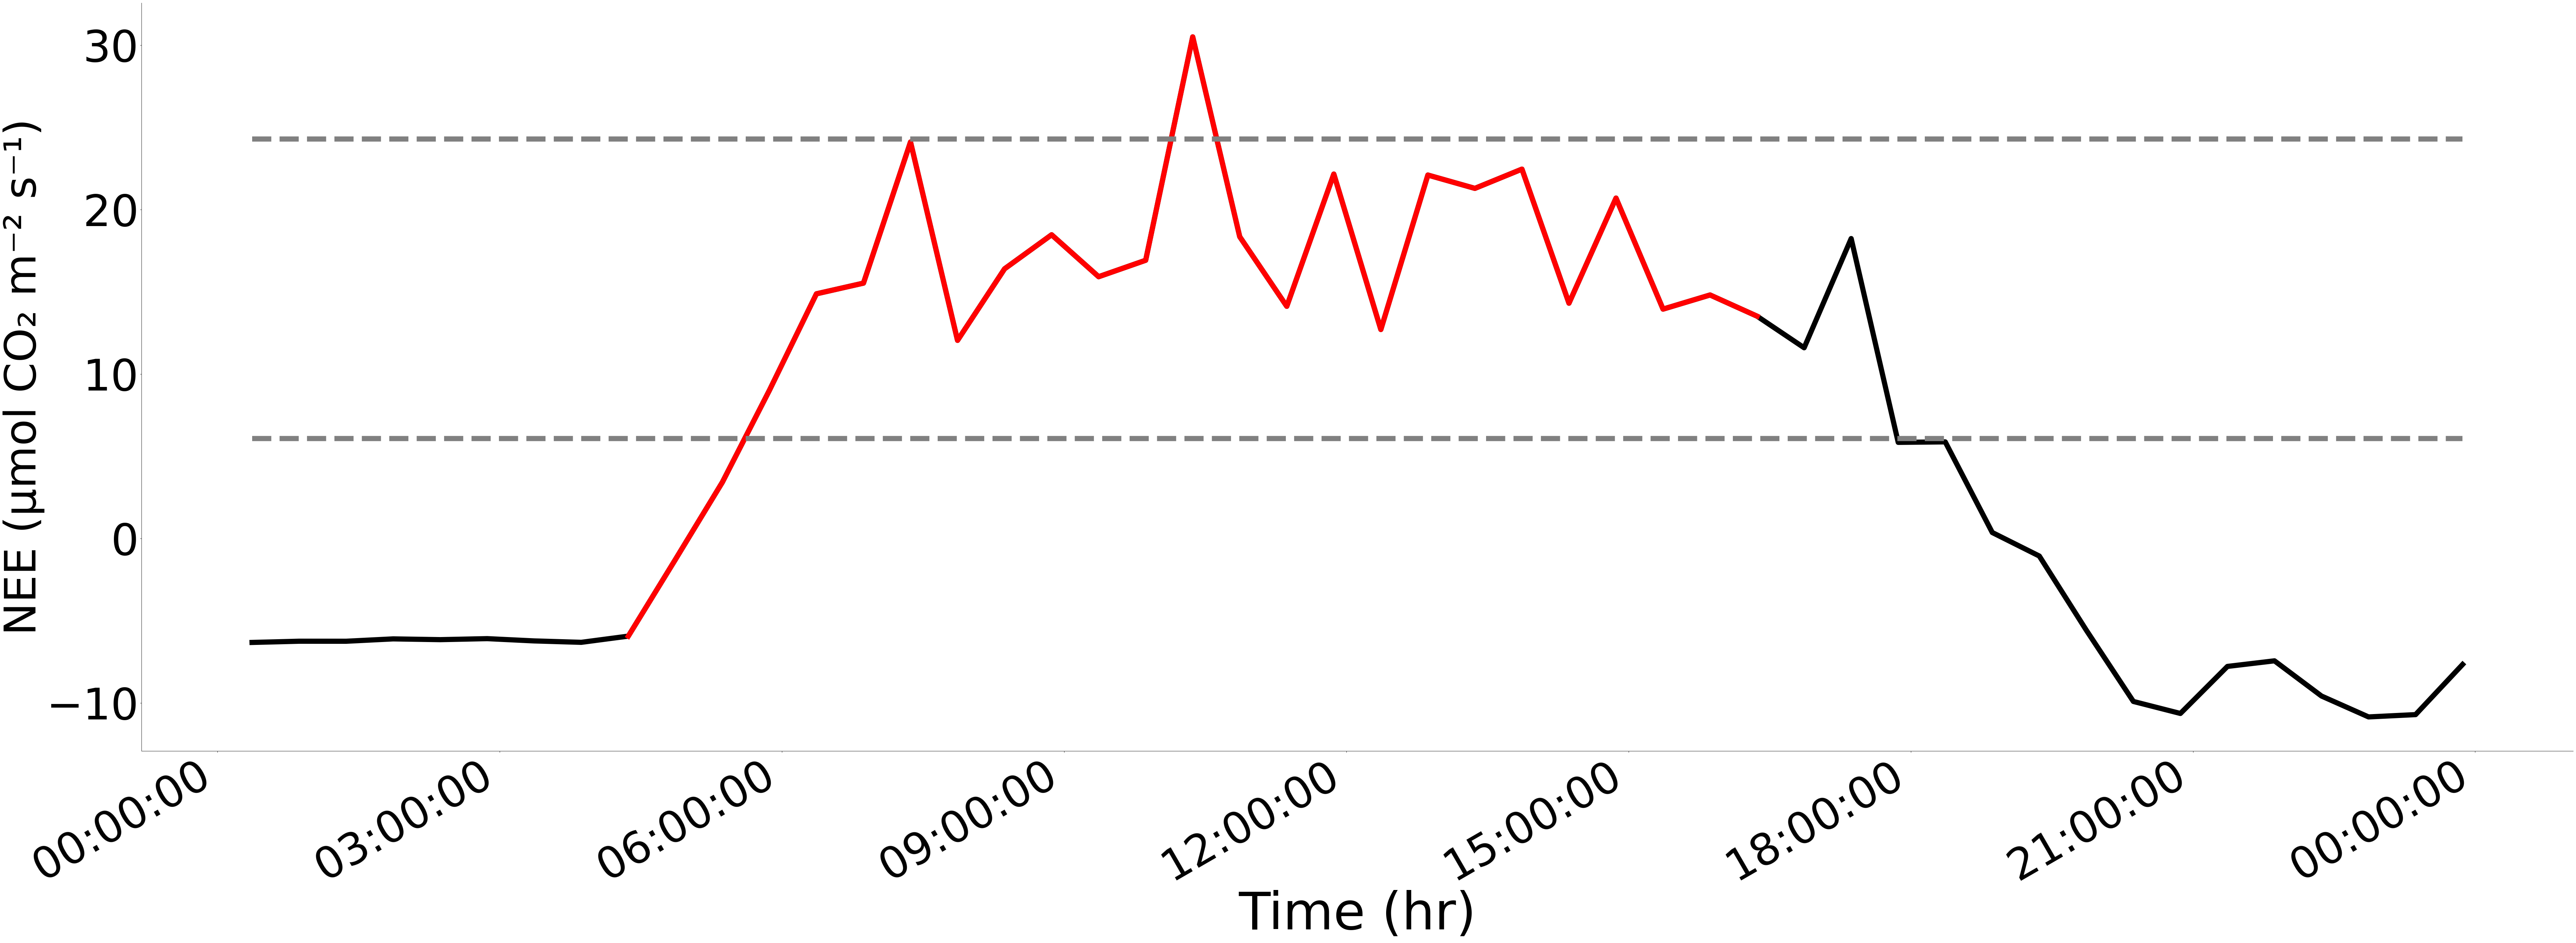

In [4]:
# PANEL FIGURE - B 

# Defining a single function with all calcualtions needed to plot
def nee_fp(df):
    
    # Calculating mean and standard deviation for threshold
    nee = df['NEE2']
    mean_nee = np.mean(nee)
    stdev_nee = np.std(nee)
    
    # Calculating threshold 
    c = 1.5  
    thr = mean_nee + c * stdev_nee
    
    # Finding peak that exceed threshold
    peak = []
    time_of_peak= []
    for i in range(1, len(nee)-1):
        if (nee[i] >= thr and 
            nee[i] > nee[i-1] and 
            nee[i] > nee[i+1]):
            peak.append(nee[i])
            time_of_peak.append(df['Time2'].iloc[i])
    
    # Plotting
    plt.figure(figsize=(90, 33), dpi=80)
    plt.plot(df.Time2, df.NEE2, lw=13, color='black')
    tau = pd.Timedelta(hours=6)  
    for peak_time in time_of_peak:
        mask = ((df.Time2 >= peak_time - tau) & 
                (df.Time2 <= peak_time + tau))
        plt.plot(df.Time2[mask], df.NEE2[mask], lw=13, color='red')
    
    plt.plot(df.Time2, [thr]*len(df), 
            color='gray', lw=13, ls='--')
    plt.plot(df.Time2, [mean_nee]*len(df), 
            color='gray', lw=13, ls='--')
    
    plt.xlabel("Time (hr)", fontsize=130)
    plt.ylabel("NEE (μmol CO₂ m⁻² s⁻¹)", fontsize=110)
    plt.xticks(fontsize=110)
    plt.yticks(fontsize=110)
    date_format = DateFormatter("%H:%M:%S")
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.gcf().autofmt_xdate()
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    return plt.gcf()

fig = nee_fp(df)
plt.show()

In [5]:
# Extracting NEP and timestamps
x = df['NEE']
time = df['Time']


In [6]:
# defining statistics for threshold
x_avg = [np.mean(x)] * len(x)
x_stdev = [np.std(x)] * len(x)
list1 = x_avg
list2 = x_stdev
list3 = [i * 1.5 for i in list2]
sum_list = [a + b for a, b in zip(list1, list3)]
list_diff = [a - b for a, b in zip(list1, list3)]

In [7]:
# Getting peaks above the threshold
a = x
listup=[]
listup1=[]
timeup1=[]
listupindices=[]
listup1indices=[]
for i in range(1,len(a)-1):
    if a[i]>=sum_list[1] and a[i] != a[i+1] and a[i-1]<a[i] and a[i+1]<a[i]:
        listup.append(a[i])
        listupindices.append(a[i])
        
    elif a[i]>=sum_list[1] and a[i]==a[i+1] and a[i-1]<a[i] and a[i+2]<a[i]:
        listup1.append(a[i])
        timeup1.append(time[i])
        listup1indices.append(a[i])
print(len(listup1))
print(listup1)
print(timeup1)
print(len(listup))
print(listup)

0
[]
[]
1
[30.5]


In [8]:
templistup=[]
timeup=[]
templistupindices=[]

for i in range(1,len(a)-1):
    if a[i]>=sum_list[1] and a[i-1]<a[i] and a[i+1]<a[i]:
        templistup.append(a[i]) 
        timeup.append(time[i])
        templistupindices.append(i)
     
print(len(templistup))
print(templistup)
print(timeup)


1
[30.5]
[Timestamp('2001-05-26 10:22:00')]


In [9]:
upvalues_list = listup + listup1
up_time = timeup + timeup1
pd.DataFrame({'peakstime':up_time,'peakvalues':upvalues_list})
filtered_peaks =[]
for i in range(len(upvalues_list)):
    l2=[]
    l2.append(up_time[i])
    l2.append(upvalues_list[i])
    filtered_peaks.append(l2)


In [10]:
#NEP
upvalues_list = listup + listup1
up_time = timeup + timeup1
pd.DataFrame({'peakstimeNEE':up_time,'peakvaluesNEE':upvalues_list})


,peakstimeNEE,peakvaluesNEE
0,2001-05-26 10:22:00,30.5


In [11]:
#NEP FILTERING 
from datetime import timedelta
selected_peaks = []
if len(filtered_peaks) == 0:
    pass

start = 0
maximum_peak = filtered_peaks[0][1]
selected_peak_index = 0
interval = timedelta(hours = 6)

for j in range(1, len(filtered_peaks)):
    if filtered_peaks[j][0] - filtered_peaks[start][0] >= interval:
        selected_peaks.append(selected_peak_index)
        maximum_peak = -1
        while j < len(filtered_peaks) and filtered_peaks[j][0] - filtered_peaks[selected_peak_index][0] < interval:
            j = j + 1
        
        start = j
        maximum_peak = -1

    if j < len(filtered_peaks) and filtered_peaks[j][1] > maximum_peak:
        maximum_peak = filtered_peaks[j][1]
        selected_peak_index = j

if maximum_peak != -1:
    selected_peaks.append(selected_peak_index)

print(selected_peaks)

golden_peaks = []

for i in selected_peaks:
    golden_peaks.append(filtered_peaks[i])

golden_peaks_df = pd.DataFrame(golden_peaks, columns=['Timestamp', 'golden_peaks'])
golden_peaks_df.head()

[0]


,Timestamp,golden_peaks
0,2001-05-26 10:22:00,30.5


In [12]:
golden_peaks_df
filtered_peaks.sort()
from datetime import timedelta
selected_peaks = []
if len(filtered_peaks) == 0:
    pass

start = 0
maximum_peak = filtered_peaks[0][1]
selected_peak_index = 0
interval = timedelta(hours = 6)

for j in range(1, len(filtered_peaks)):
    if filtered_peaks[j][0] - filtered_peaks[start][0] >= interval:
        selected_peaks.append(selected_peak_index)
        maximum_peak = -1
        while j < len(filtered_peaks) and filtered_peaks[j][0] - filtered_peaks[selected_peak_index][0] < interval:
            j = j + 1
        
        start = j
        maximum_peak = -1

    if j < len(filtered_peaks) and filtered_peaks[j][1] > maximum_peak:
        maximum_peak = filtered_peaks[j][1]
        selected_peak_index = j

if maximum_peak != -1:
    selected_peaks.append(selected_peak_index)

print(selected_peaks)

golden_peaks = []

for i in selected_peaks:
    golden_peaks.append(filtered_peaks[i])

golden_peaks_df = pd.DataFrame(golden_peaks, columns=['Timestamp', 'golden_peaks'])
golden_peaks_df.head()

[0]


,Timestamp,golden_peaks
0,2001-05-26 10:22:00,30.5


In [13]:
#For NEP, creating tstat+6 and tstat-6 lists
gp = golden_peaks_df
golden_peaks_tstat= pd.DataFrame(gp, columns=['Timestamp'])
gp["Timestamp"] = pd.to_datetime(gp["Timestamp"])

freq = 'H' 
date = gp["Timestamp"] + pd.Timedelta(6, unit=freq) 
print(date)
dateminus =gp["Timestamp"] + pd.Timedelta(-6, unit=freq)
print(dateminus)

0   2001-05-26 16:22:00
Name: Timestamp, dtype: datetime64[ns]
0   2001-05-26 04:22:00
Name: Timestamp, dtype: datetime64[ns]


/var/folders/tc/krjl03bn2cgbs5z5128vc9y80000gn/T/ipykernel_56326/1593440748.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  date = gp["Timestamp"] + pd.Timedelta(6, unit=freq)
/var/folders/tc/krjl03bn2cgbs5z5128vc9y80000gn/T/ipykernel_56326/1593440748.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  dateminus =gp["Timestamp"] + pd.Timedelta(-6, unit=freq)


In [16]:
# Creating a dataframe for NEP FPs
lower_bound = list(dateminus)
upper_bound = list(date)
bounds = dict()

for i in range (0,len(lower_bound)):
    date_lower=lower_bound[i]
    date_upper=upper_bound[i]
    df_copy = df.copy()
    df_copy = df_copy[df_copy['Time']>=date_lower]
    df_copy=df_copy[df_copy['Time']<=date_upper]
    bounds[i]=df_copy
    
    df0 = df_copy.copy()
    df0 = df0.reset_index(drop=True)
    df0 = df0.drop(columns=['Time','Time1','NEE1','Time2','NEE2'], axis=1)
    df0.columns = ['NEE' + str(i+1)]
    if i == 0:
        df_all = df0.copy()
    else:
        df_all = df_all.join(df0)

In [17]:
# Calculating average
df_all_avg = df_all.mean(axis=1)
# df_all_avg
df_all.head()

,NEE1
0,-5.92856
1,-1.27512
2,3.42812
3,9.01462
4,14.88050


In [18]:
# Normalizing FP
cell_values = df_all.iloc[12, :].values.tolist()
divided_df_all = df_all.div(cell_values)

In [19]:
# Calculating average of normaized FP
divided_df_all_avg = divided_df_all.mean(axis=1)

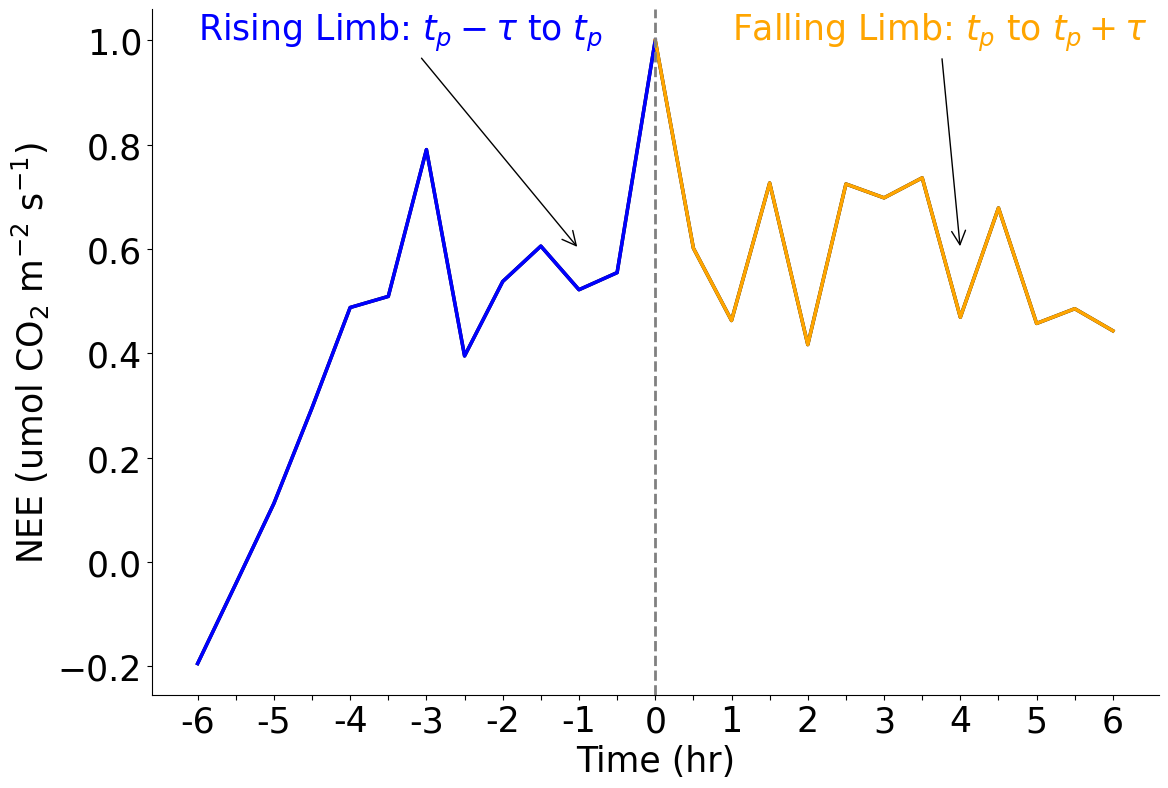

In [20]:
# PANEL FIGURE C

x_tick_labels = (-6, -5.5, -5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6)

fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the average data
ax.plot(x_tick_labels, divided_df_all_avg, lw=2.5, color='k', label="Avg Folded Path")

ax.set_xticks(x_tick_labels)
ax.set_xticklabels(x_tick_labels)
xticks = ax.xaxis.get_major_ticks()
for i in range(1, len(xticks), 2):  
    xticks[i].label1.set_visible(False)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Time (hr)", size='25')
plt.ylabel("NEE (umol CO$_2$ m$^{-2}$ s$^{-1}$)", size='25')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Plotting rising and falling limbs
rising_limb_color = "blue"
falling_limb_color = "orange"
peak_idx = np.argmax(divided_df_all_avg)
ax.plot(x_tick_labels[:peak_idx+1], divided_df_all_avg[:peak_idx+1], color=rising_limb_color, lw=2.5, label="Rising Limb")
ax.plot(x_tick_labels[peak_idx:], divided_df_all_avg[peak_idx:], color=falling_limb_color, lw=2.5, label="Falling Limb")
line_height = max(divided_df_all_avg) + 0.2  
ax.axvline(x=0, color='gray', linestyle='--', lw=2, label="Peak Line")

ax.annotate("Rising Limb: $t_p - \\tau$ to $t_p$", xy=(-1, 0.6), xytext=(-6, 1),
            arrowprops=dict(facecolor=rising_limb_color, arrowstyle="->"), fontsize=25, color=rising_limb_color)

ax.annotate("Falling Limb: $t_p$ to $t_p + \\tau$", xy=(4, 0.6), xytext=(1, 1),
            arrowprops=dict(facecolor=falling_limb_color, arrowstyle="->"), fontsize=25, color=falling_limb_color)

plt.tight_layout()
plt.show()


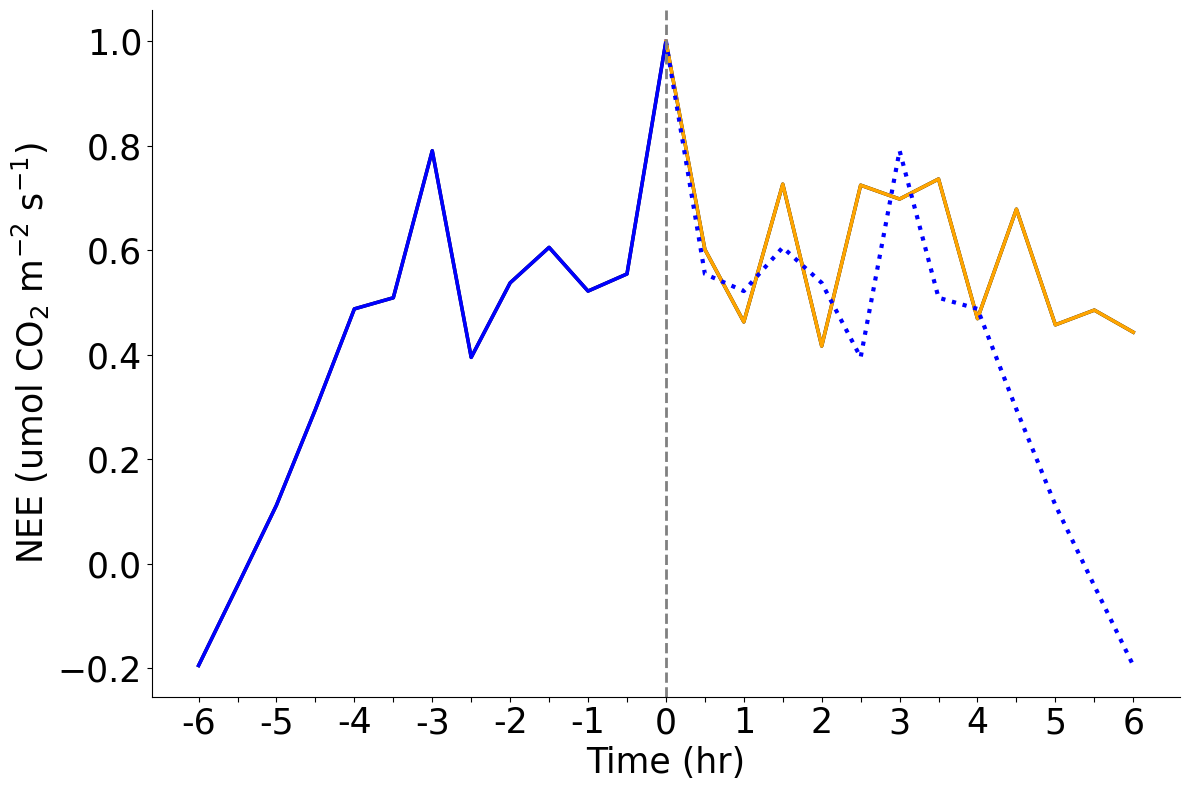

In [21]:
# PANEL FIGURE D

x_tick_labels = (-6, -5.5, -5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6)
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the average data
ax.plot(x_tick_labels, divided_df_all_avg, lw=2.5, color='k')
ax.set_xticks(x_tick_labels)
ax.set_xticklabels(x_tick_labels)
xticks = ax.xaxis.get_major_ticks()
for i in range(1, len(xticks), 2):  
    xticks[i].label1.set_visible(False)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Time (hr)", size='25')
plt.ylabel("NEE (umol CO$_2$ m$^{-2}$ s$^{-1}$)", size='25')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Plotting rising and falling limbs 
rising_limb_color = "blue"
falling_limb_color = "orange"
peak_idx = np.argmax(divided_df_all_avg)
ax.plot(x_tick_labels[:peak_idx+1], divided_df_all_avg[:peak_idx+1], color=rising_limb_color, lw=2.5, label="Rising Limb")
ax.plot(x_tick_labels[peak_idx:], divided_df_all_avg[peak_idx:], color=falling_limb_color, lw=2.5, label="Falling Limb")

# Inverting the up_dfall data and overlaying on the right side
up_dfall = divided_df_all_avg[:13][::-1]  
ax.plot(x_tick_labels[-13:], up_dfall, lw=3, color='blue', label="up_dfall", ls=':')

line_height = max(divided_df_all_avg) + 0.2 
ax.axvline(x=0, color='gray', linestyle='--', lw=2, label="Peak Line")
plt.tight_layout()
plt.show()


In [22]:
#splitting df_all into towards and awzay
divided_df_all = pd.DataFrame(divided_df_all)
up_dfall = divided_df_all.iloc[0:13]
low_dfall = divided_df_all.iloc[12:25]
up1_dfall = up_dfall.reindex(index=up_dfall.index[::-1])
idx2 = up1_dfall.reset_index()
idx1 = low_dfall.reset_index()
diff_df = idx1.sub(idx2)
#asymmetry coefficient
ac = diff_df.drop(columns=['index'])
ac_avg = ac.mean(axis=1)
# ac_avg

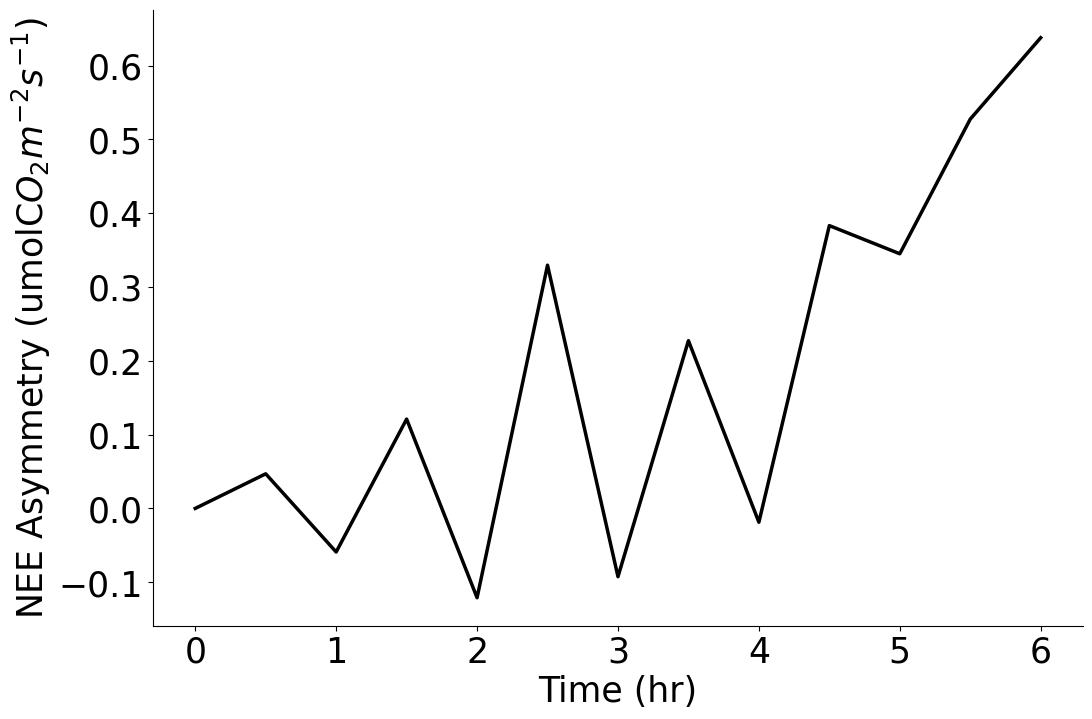

In [23]:
# PANEL FIGURE E
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

x_tick_labels = (0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6)

ax.set_xticks(range(len(x_tick_labels)))
ax.set_xticklabels(x_tick_labels)

xticks = ax.xaxis.get_major_ticks()
hidden_indices = [1, 3, 5, 7, 9, 11]

for index in hidden_indices:
    if index < len(xticks):
        xticks[index].label1.set_visible(False)
        xticks[index].tick1line.set_visible(False)

# plotting the average data
ax.plot(ac_avg, lw=2.5, color='k', label="avg")

plt.xticks(range(len(x_tick_labels)), fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Time (hr)", size='25')
plt.ylabel('NEE Asymmetry (umolC$O_{2}$$m^{-2}$$s^{-1}$)', fontsize=25)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()